# PyTorch ile Derin Öğrenme

Klasik makine öğrenimi, özellikler ve etiketler arasındaki ilişkileri belirlemek için istatistiklerin kullanılmasına dayanır ve tahmine dayalı modeller oluşturmak için çok etkili olabilir. Bununla birlikte, verilerin işlenmesi için gereken bilgi işlem teknolojisindeki ilerlemelerle birleştiğinde, verilerin kullanılabilirliğindeki büyük artış, beynin yapay sinir ağı adı verilen bir yapıdaki bilgileri işleme biçimini taklit eden yeni makine öğrenimi tekniklerinin ortaya çıkmasına yol açmıştır.

PyTorch, derin sinir ağları (DNN'ler) dahil olmak üzere makine öğrenimi modelleri oluşturmaya yönelik bir çerçevedir. Bu örnekte, penguenleri culmenlerinin (gaga) uzunluğuna ve derinliğine, palet uzunluğuna ve vücut kütlelerine göre türlere ayıran basit bir sinir ağı oluşturmak için PyTorch kullanacağız.

## Veri Kümesini Keşfetme

Bir model oluşturmak için PyTorch'u kullanmaya başlamadan önce, üç farklı penguen türünün gözlemlerini içeren Palmer Adaları penguenleri veri kümesinden ihtiyacımız olan verileri yükleyelim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("penguins.csv").dropna()

In [4]:
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [5]:
# Derin Öğrenme modelleri, özellikler benzer ölçeklerde olduğunda en iyi şekilde çalışır
# Gerçek bir çözümde, her özellik için bazı özel normalleştirmeler uygulardık, ancak işleri basit tutmak için
# FlipperLength ve BodyMass'ı yeniden ölçeklendireceğiz

df["FlipperLength"] = df["FlipperLength"] / 10
df["BodyMass"] = df["BodyMass"] / 100

In [6]:
# Veri kümesi, derin öğrenme için kullanışlı olamayacak kadar küçük
# Bu yüzden boyutunu büyütmek için fazla örnek alacağız

for i in range(1,3):
    df = df.append(df)

In [7]:
# 10 gözlemden oluşan rastgele bir örnek gösterin
sample = df.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
228,47.5,14.2,20.9,46.00,1
106,38.6,17.2,19.9,37.50,0
31,37.2,18.1,17.8,39.00,0
92,34.0,17.1,18.5,34.00,0
36,38.8,20.0,19.0,39.50,0
240,47.5,14.0,21.2,48.75,1
206,46.5,14.4,21.7,49.00,1
182,47.3,15.3,22.2,52.50,1
13,38.6,21.2,19.1,38.00,0
280,52.7,19.8,19.7,37.25,2


**Species** sütunu, modelimizin tahmin edeceği etikettir. Her etiket değeri, 0, 1 veya 2 olarak kodlanmış bir penguen türü sınıfını temsil eder. Aşağıdaki kod, bu sınıf etiketlerinin karşılık geldiği gerçek türleri gösterir.

In [8]:
penguin_classes = ["Adelie", "Gentoo", "Chinstrap"]
print(sample.columns[0:5].values, "SpeciesName")
for index, row in df.sample(10).iterrows():
    print("[", row[0], row[1], row[2],row[3], int(row[4]), "]", penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 39.0 17.1 19.1 30.5 0 ] Adelie
[ 46.2 14.1 21.7 43.75 1 ] Gentoo
[ 48.1 15.1 20.9 55.0 1 ] Gentoo
[ 49.0 19.6 21.2 43.0 2 ] Chinstrap
[ 50.3 20.0 19.7 33.0 2 ] Chinstrap
[ 46.5 14.5 21.3 44.0 1 ] Gentoo
[ 44.9 13.3 21.3 51.0 1 ] Gentoo
[ 47.3 13.8 21.6 47.25 1 ] Gentoo
[ 46.5 14.4 21.7 49.0 1 ] Gentoo
[ 49.1 14.5 21.2 46.25 1 ] Gentoo


Denetimli öğrenme probleminde yaygın olarak olduğu gibi, veri setini modeli eğitmek için bir kayıt setine ve eğitilen modeli doğrulamak için daha küçük bir sete ayıracağız.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
features = ["CulmenLength", "CulmenDepth", "FlipperLength", "BodyMass"]
label = "Species"

X_train, X_test, y_train, y_test = train_test_split(df[features].values, df[label].values, test_size=0.30, random_state=0)

print(f"Training Set: {len(X_train)}\nTest Set: {len(X_test)}")
print("Sample of features and labels:")

# İlk 25 eğitim özelliğine ve ilgili etiketlere göz atın
for n in range(0,24):
    print(X_train[n], y_train[n], "(" + penguin_classes[y_train[n]] + ")")

Training Set: 957
Test Set: 411
Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


*Özellikler*, her bir penguen gözleminin ölçümleridir ve *etiket*, gözlemin temsil ettiği penguen türünü (Adelie, Gentoo veya Chinstrap) gösteren sayısal bir değerdir.

## PyTorch kitaplıklarını yükleme ve içe aktarma

Penguen sınıflandırıcımızı oluşturmak için PyTorch kullanmayı planladığımız için, kullanmayı planladığımız PyTorch kitaplıklarını yüklemek ve içe aktarmak için aşağıdaki iki hücreyi çalıştırmamız gerekecek. PyTorch'un özel kurulumu, işletim sisteminize ve bilgisayarınızda *cuda* aracılığıyla yüksek performanslı işleme için kullanılabilecek grafik işlem birimlerinin (GPU'lar) olup olmadığına bağlıdır. 

In [13]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Tekrarlanabilirlik için rastgele tohum ayarlayın
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.12.1


## Verileri PyTorch için hazırlama

PyTorch, eğitim ve doğrulama verilerini toplu olarak yüklemek için *veri yükleyicileri* kullanır. Verileri zaten numpy dizilerine yükledik, ancak bunları PyTorch veri kümelerine (verilerin PyTorch *tensor* nesnelerine dönüştürüldüğü) sarmamız ve bu veri kümelerinden yığınları okumak için yükleyiciler oluşturmamız gerekiyor.

In [14]:
# Eğitim verileri ve etiketleri için bir veri kümesi ve yükleyici oluşturun

train_x = torch.Tensor(X_train).float()
# Eğitim verilerini içeren x_train listesini PyTorch Tensor formatına dönüştürüyoruz. 
# Ayrıca, verilerin türünü float olarak belirtiyoruz.
train_y = torch.Tensor(y_train).long()
# Eğitim etiketlerini içeren y_train listesini PyTorch Tensor formatına dönüştürüyoruz. 
# Etiketler tamsayı değerleri olduğu için long türünü kullanıyoruz.
train_ds = td.TensorDataset(train_x, train_y)
# TensorDataset sınıfını kullanarak eğitim verilerini ve etiketlerini birleştirerek eğitim veri kümesini oluşturuyoruz. 
# Bu, her veri noktasının ilgili etiketiyle birlikte bir çift oluşturur.
train_loader = td.DataLoader(train_ds, batch_size=20, shuffle=False, num_workers=1)
# Eğitim veri kümesini DataLoader ile yüklüyoruz. 
# Bu, veri kümesini belirtilen batch_size (20) sayısında küçük parçalara böler. 
# shuffle=False olduğu için veriler karıştırılmadan sırayla yüklenir. 
# num_workers=1, verileri yükleme işleminde birden fazla işçi işlemcinin kullanılmayacağı anlamına gelir 
# (daha fazla işçi, verilerin yüklenmesini hızlandırabilir, ancak 1 işçi de çoğu durumda yeterli olabilir).

# Test verileri ve etiketleri için bir veri kümesi ve yükleyici oluşturun

test_x = torch.Tensor(X_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x, test_y)
test_loader = td.DataLoader(test_ds, batch_size=20, shuffle=False, num_workers=1)

print("Ready to load data")

Ready to load data


## Bir sinir ağı tanımlama

Artık sinir ağımızı tanımlamaya hazırız. Bu durumda, birbirine tamamen bağlı 3 katmandan oluşan bir ağ oluşturacağız:
* Her özellik (bu durumda, dört penguen ölçümü) için bir giriş değeri alan ve bir *ReLU* aktivasyon işlevi uygulayan bir giriş katmanı.
* On girdi alan ve bir *ReLU* aktivasyon işlevi uygulayan gizli bir katman.
* Her penguen türü için negatif olmayan bir sayısal çıktı üreten bir çıktı katmanı (bir kayıp fonksiyonu, üç olası penguen türünün her biri için sınıflandırma olasılıklarına dönüşecektir).

In [15]:
# Gizli katman düğümü sayısı
hl = 10
# hl, gizli katmandaki düğüm sayısını belirten bir değişkendir. 
# Gizli katman düğüm sayısı, modele veri özelliklerine ve problem karmaşıklığına bağlı olarak seçilen bir hiperparametredir.

# Sinir ağını tanımlayın
class PenguinNet(nn.Module):
    # PenguinNet adında bir sınıf tanımlıyoruz ve bu sınıf nn.Module sınıfından kalıtım alıyor. 
    # Bu, bir PyTorch modelinin temel sınıf yapısıdır ve modelimizi bu temel sınıftan türetmemiz gerektiği anlamına gelir.
    def __init__(self):
        # Sınıfımızın yapıcı (constructor) yöntemi, modelimizin başlangıç durumunu ayarlamak için kullanılır. 
        # __init__ yöntemi, bu model için gerekli tüm katmanları ve yapıları tanımlamak üzere kullanılır.
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        # İlk gizli katmanı oluşturuyoruz. 
        # nn.Linear() fonksiyonu, tam bağlantılı bir katman (yani, tüm girişlerle tüm çıkışlar arasında bağlantı) tanımlar. 
        # len(features) giriş özelliklerinin sayısını temsil eder ve hl gizli katmandaki düğüm sayısını belirtir.
        self.fc2 = nn.Linear(hl, hl)
        # kinci gizli katmanı oluşturuyoruz. 
        # Bu katman da tam bağlantılıdır ve giriş ve çıkış düğüm sayıları hl olarak belirtilmiştir.
        self.fc3 = nn.Linear(hl, len(penguin_classes))
        # Çıkış katmanını oluşturuyoruz. 
        # Bu katman, sonuç sınıflarının sayısına (yani penguin_classes) ve gizli katmandaki düğüm sayısına bağlı olarak tanımlanır.
        
    def forward(self, x):
        # İleri geçiş işlevini (forward) tanımlıyoruz. Bu yöntem, modelin bir girdi verildiğinde nasıl davranacağını belirtir.
        x = torch.relu(self.fc1(x))
        # Giriş verilerini fc1 katmanından geçirerek ve ardından ReLU aktivasyon fonksiyonunu uygulayarak ilk gizli katmanın 
        # çıktısını hesaplarız. ReLU, lineer olmayan bir aktivasyon fonksiyonudur ve genellikle gizli katmanlarda kullanılır.
        x = torch.relu(self.fc2(x))
        # İkinci gizli katmanın çıktısını hesaplamak için fc2 katmanından geçirir ve tekrar ReLU aktivasyon fonksiyonunu uygularız.
        x = torch.relu(self.fc3(x))
        # Son olarak, çıkış katmanının çıktısını hesaplamak için fc3 katmanından geçirir ve yine ReLU aktivasyonunu uygularız. 
        # Ancak, bu son katman olduğu için, çıkışlar genellikle bir aktivasyon fonksiyonu olmadan kullanılır (örneğin, sınıflandırma için softmax).
        return x
        # Son olarak, işlenmiş çıktıları döndürürüz.
    
# Ağdan bir model örneği oluşturun
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


## Modeli eğitme

Modeli eğitmek için, eğitim değerlerini ağ üzerinden tekrar tekrar beslememiz, kaybı hesaplamak için bir kayıp fonksiyonu kullanmamız, ağırlık ve yanlılık değeri ayarlamalarını geri yaymak için bir optimize edici kullanmamız ve sakladığımız test verilerini kullanarak modeli doğrulamamız gerekir.

Bunu yapmak için, modeli eğitmek ve optimize etmek için bir işlev ve modeli test etmek için bir işlev oluşturacağız. Ardından, her bir dönem için kayıp ve doğruluk istatistiklerini günlüğe kaydederek, bu işlevleri yinelemeli olarak 50 dönem boyunca arayacağız.

In [16]:
def train(model, data_loader, optimizer):
    # Modeli eğitim moduna ayarlayın
    model.train()
    # Modeli eğitim moduna ayarlar. Eğitim modunda, modeldeki bazı katmanlar (örneğin, dropout veya batch normalization gibi) 
    # davranışlarını değiştirir, bu da eğitim sırasında farklı davranışlar elde edilmesini sağlar.
    train_loss = 0
    # Eğitim verileri üzerindeki toplam kayıp değerini takip etmek için train_loss adında bir değişken tanımlarız 
    # ve başlangıçta değerini sıfır yaparız.
    
    for batch, tensor in enumerate(data_loader):
        # Veri yükleyici data_loader üzerinden veri yığınlarını (batches) almak için bir döngü başlatılır. 
        # Her yinelemede bir yığın veri elde edilir.
        data, target = tensor
        # Eğitim veri yığınından girdi verilerini (data) ve hedef etiketleri (target) ayırırız.
        
        # ileri bildirim
        optimizer.zero_grad()
        # Modelin optimizasyon algoritması için gradyanları sıfırlar. 
        # Bu işlem, her yığında gradyanları sıfırlayarak yeni bir gradyan hesaplamaya başlamamızı sağlar.
        out = model(data)
        # Model, veri yığınını data ile besleyerek ileriye doğru çalıştırılır ve çıktıları out olarak alırız.
        loss = loss_criteria(out, target)
        # Çıktıları ve gerçek hedef etiketlerini kullanarak kayıp fonksiyonu olan loss_criteria ile modelin kaybını hesaplarız.
        train_loss += loss.item()
        # Her yığında hesaplanan kayıp değerini toplam kayıp değerine ekleriz. 
        # Böylece, eğitim verileri üzerindeki toplam kayıp miktarını takip ederiz.
        
        # geri yayılma
        loss.backward()
        # Hesaplanan kayıp fonksiyonunun gradyanını hesaplayarak geriye doğru yayılım (backpropagation) işlemini 
        # gerçekleştiririz. Bu, gradyanların daha önce bahsedilen sıfırlama işleminden sonra hesaplanmasını sağlar.
        optimizer.step()
        # Modelin ağırlıklarını gradyanlara göre güncellemek için optimizasyon adımını (optimizer step) gerçekleştiririz.
        
    # Getiri ortalama kaybı    
    avg_loss = train_loss / (batch + 1)
    # Eğitim verileri üzerindeki ortalama kaybı hesaplarız. Toplam kayıp miktarını yığın sayısına böleriz.
    print("Training set: Average loss: {:.6f}".format(avg_loss))
    # Her epoch'ta eğitim verileri üzerindeki ortalama kaybı ekrana yazdırırız.

In [22]:
def test(model, data_loader):
    # Modeli değerlendirme moduna geçirin (böylece geri yaymayız)
    model.eval()
    # Modeli değerlendirme moduna (evaluation mode) geçirir. 
    # Değerlendirme modunda, modeldeki bazı katmanlar (örneğin, dropout veya batch normalization gibi) davranışlarını değiştirir,
    # bu da test verileri üzerinde doğru sonuçlar alınmasını sağlar.
    test_loss = 0
    # Test verileri üzerindeki toplam kayıp değerini takip etmek için test_loss adında bir değişken tanımlarız ve 
    # başlangıçta değerini sıfır yaparız.
    correct = 0
    # oğru tahmin edilen örnek sayısını takip etmek için correct adında bir değişken tanımlarız ve 
    # başlangıçta değerini sıfır yaparız.
    
    with torch.no_grad():
        # torch.no_grad() bağlamı içinde, modelin geriye doğru yayılım yapmamasını ve gradyanları güncellememesini sağlar. 
        # Bu, modelin sadece değerlendirme yapmasını ve gradyanları hesaplamamasını sağlar, böylece daha hızlı çalışır ve 
        # bellek tüketimi düşer.
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Test veri yığınını (data) ve hedef etiketleri (target) ayırırız.
            
            # Tahminleri alın
            out = model(data)
            # Modeli veri yığını data ile besleyerek ileriye doğru çalıştırır ve çıktıları (out) alırız.
            
            # Kaybı hesaplayın
            test_loss += loss_criteria(out, target).item()
            #  Her yığında hesaplanan kayıp değerini toplam test kaybına ekleriz.
            
            # Doğruluğu hesaplayın
            _, predicted = torch.max(out.data, 1)
            # Çıktılardan en yüksek olasılığa sahip tahminleri (predicted) elde ederiz.
            correct += torch.sum(target==predicted).item()
            # Doğru tahmin edilen örnek sayısını artırırız. 
            # Tahmin edilen değerler (predicted) ve gerçek etiketler (target) arasında ne kadar çok eşleşme olduğunu buluruz 
            # ve bunları toplarız.
            
    # Bu dönem için ortalama kaybı ve toplam doğruluğu hesaplayın
    avg_loss = test_loss / batch_count
    #  Test verileri üzerindeki ortalama kaybı hesaplarız. Toplam kayıp miktarını yığın sayısına böleriz.
    print("Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n".format(avg_loss, correct,
                                                                                     len(data_loader.dataset),
                                                                                     100. * correct / len(data_loader.dataset)))
    # Eğitim döngüsünden sonra her epoch'ta, doğrulama verileri üzerindeki ortalama kaybı ve doğruluğu (accuracy) ekrana yazdırırız.
    return avg_loss
    # Test verileri üzerindeki ortalama kaybı döndürürüz. 
    # Bu, eğitim döngüsünde kayıpların nasıl değiştiğini izlememizi ve modelin ne kadar iyi performans gösterdiğini değerlendirmemizi sağlar.

In [23]:
# Kayıp kriterlerini belirtin (çok sınıflı sınıflandırma için CrossEntropyLoss kullanacağız)
loss_criteria = nn.CrossEntropyLoss()
# Çok sınıflı sınıflandırma için CrossEntropyLoss kayıp fonksiyonunu belirleriz. 
# Bu, modelin tahminleri ile gerçek etiketler arasındaki farkı hesaplamak için kullanılacak olan kayıp fonksiyonudur.

# Ağırlıkları ayarlamak için bir "Adam" iyileştirici kullanın
learning_rate = 0.001
# Optimizer için öğrenme oranını belirleriz. Bu, ağırlıkları güncellerken kullanılacak adım büyüklüğünü belirler.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Optimizer'ı oluştururuz. Burada Adam optimizer'ı kullanıyoruz, ancak PyTorch, farklı optimizasyon algoritmalarını da destekler.
optimizer.zero_grad()
# Eğitim döngüsüne başlamadan önce, gradyanları sıfırlayarak yeni bir eğitim sürecine başlarız. 
# Gradyanları sıfırlamak, yeni bir yığın veriyle eğitim yaparken bir önceki yığında hesaplanan gradyanların 
# kullanılmamasını sağlar.

# Bu dizilerdeki her epoch için metrikleri izleyeceğiz
# Eğitim ve doğrulama verileri üzerindeki kayıp değerleri ve epoch numaralarını kaydedeceğimiz boş listeleri tanımlarız.
epoch_nums = []
training_loss = []
validation_loss = []

# 50'den fazla epoch eğitin
epochs = 50
# Eğitim döngüsünün kaç kez (epoch) çalışacağını belirleriz. Her epoch, tüm eğitim verilerini bir kez işlemek anlamına gelir.
for epoch in range(1, epochs + 1):
    # epoch numarasını yazdır
    print("Epoch: {}".format(epoch))
    
    # Ağırlıkları optimize etmek için eğitim verilerini modele besleyin
    train_loss = train(model, train_loader, optimizer)
    # train fonksiyonunu çağırarak modeli eğitiriz. 
    # Bu fonksiyon, eğitim verilerini kullanarak modelin ağırlıklarını optimize eder ve eğitim verileri üzerindeki ortalama kaybı hesaplar.
    
    # Performansını kontrol etmek için test verilerini modele besleyin
    test_loss = test(model, test_loader)
    # test fonksiyonunu çağırarak modelin doğrulama (test) verileri üzerindeki performansını değerlendiririz. 
    # Bu fonksiyon, test verileri üzerindeki ortalama kaybı ve doğruluğu hesaplar.
    
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    #  Her epoch'un sonunda, epoch numarasını (epoch) ve eğitim ve doğrulama verileri üzerindeki kayıp değerlerini 
    # (train_loss, test_loss) ilgili listelere ekleriz.

Epoch: 1
Training set: Average loss: 1.009175
Validation set: Average loss: 0.983048, Accuracy: 165/411 (40%)

Epoch: 2
Training set: Average loss: 0.963539
Validation set: Average loss: 0.931172, Accuracy: 200/411 (49%)

Epoch: 3
Training set: Average loss: 0.899828
Validation set: Average loss: 0.822713, Accuracy: 277/411 (67%)

Epoch: 4
Training set: Average loss: 0.786715
Validation set: Average loss: 0.731690, Accuracy: 288/411 (70%)

Epoch: 5
Training set: Average loss: 0.728464
Validation set: Average loss: 0.686533, Accuracy: 298/411 (73%)

Epoch: 6
Training set: Average loss: 0.694572
Validation set: Average loss: 0.657955, Accuracy: 321/411 (78%)

Epoch: 7
Training set: Average loss: 0.669721
Validation set: Average loss: 0.637636, Accuracy: 334/411 (81%)

Epoch: 8
Training set: Average loss: 0.650397
Validation set: Average loss: 0.620580, Accuracy: 340/411 (83%)

Epoch: 9
Training set: Average loss: 0.635174
Validation set: Average loss: 0.606898, Accuracy: 347/411 (84%)

E

Eğitim süreci devam ederken neler olduğunu anlamaya çalışalım:

1. Her *dönemde*, eğitim verilerinin tamamı ağ üzerinden iletilir. Her gözlem için dört özellik ve giriş katmanında karşılık gelen dört düğüm vardır - böylece her gözlem için özellikler o katmana dört değerin bir vektörü olarak iletilir. Bununla birlikte, verimlilik için özellik vektörleri yığınlar halinde gruplandırılır; yani aslında her seferinde çoklu özellik vektörlerinden oluşan bir matris beslenir.
2. Özellik değerleri matrisi, başlatılan ağırlıkları ve yanlılık değerlerini kullanarak ağırlıklı bir toplam gerçekleştiren bir işlev tarafından işlenir. Bu fonksiyonun sonucu daha sonra bir sonraki katmandaki düğümlere iletilen değerleri kısıtlamak için giriş katmanı için aktivasyon fonksiyonu tarafından işlenir.
3. Ağırlıklı toplam ve aktivasyon fonksiyonları her katmanda tekrarlanır. Fonksiyonların tek tek skaler değerler yerine vektörler ve matrisler üzerinde çalıştığını unutmayın. Başka bir deyişle, ileri geçiş esasen bir dizi iç içe doğrusal cebir fonksiyonudur. Bu nedenle veri bilimcileri, matris ve vektör hesaplamaları için optimize edildiğinden, grafik işlem birimleri (GPU'lar) içeren bilgisayarları kullanmayı tercih ederler.
4. Ağın son katmanında, çıktı vektörleri olası her sınıf için hesaplanmış bir değer içerir (bu durumda sınıf 0, 1 ve 2). Bu vektör, bu değerleri olasılıklara dönüştüren ve gerçek sınıflara dayalı olarak beklenen değerlerden ne kadar uzakta olduklarını belirleyen bir *kayıp işlevi* tarafından işlenir - örneğin, bir Gentoo pengueni (sınıf 1) gözleminin çıktısının \ olduğunu varsayalım. [0,3, 0,4, 0,3\]. Doğru tahmin \[0,0, 1,0, 0,0\] olacaktır, dolayısıyla tahmin edilen ve gerçek değerler arasındaki fark (tahmin edilen her değerin olması gerekenden ne kadar uzakta olduğu) \[0,3, 0,6, 0,3\] olur. Bu varyans, her küme için toplanır ve dönem için eğitim verilerinin neden olduğu genel hata düzeyini (*kayıp*) hesaplamak için çalışan bir toplama olarak korunur.
5. Her çağın sonunda doğrulama verileri ağdan geçirilir ve kaybı ve doğruluğu (çıkış vektöründeki en yüksek olasılık değerine dayalı olarak doğru tahminlerin oranı) da hesaplanır. Bunu yapmak önemlidir, çünkü modelin performansını üzerinde eğitilmediği verileri kullanarak karşılaştırmamıza olanak tanır ve yeni veriler için iyi bir şekilde genelleştirilip genelleştirilmeyeceğini veya eğitim verilerine *fazla takılıp takılmadığını* belirlememize yardımcı olur.
6. Tüm veriler ağ üzerinden iletildikten sonra, *eğitim* verileri için kayıp işlevinin çıktısı (ancak *doğrulama* verileri <u>değil</u>) iyileştiriciye iletilir. Optimize edicinin kaybı nasıl işlediğine ilişkin kesin ayrıntılar, kullanılan belirli optimizasyon algoritmasına bağlı olarak değişir; ancak temelde, girdi katmanından kayıp işlevine kadar tüm ağı iç içe geçmiş (*kompozit*) büyük bir işlev olarak düşünebilirsiniz. Optimize edici, ağda kullanılan her ağırlık ve yanlılık değerine göre işlevin *kısmi türevlerini* hesaplamak için bazı diferansiyel hesaplar uygular. İç ve dış fonksiyonlarının türevlerinden bileşik bir fonksiyonun türevini belirlemenizi sağlayan *zincir kuralı* adı verilen bir şey sayesinde bunu iç içe geçmiş bir fonksiyon için verimli bir şekilde yapmak mümkündür. Burada matematiğin ayrıntıları hakkında gerçekten endişelenmenize gerek yok (iyileştirici bunu sizin için yapıyor), ancak nihai sonuç, kısmi türevlerin bize kayıp fonksiyonunun eğimi (veya *gradyan*) hakkında bilgi vermesidir. her ağırlık ve sapma değerine - başka bir deyişle, kaybı azaltmak için ağırlık ve sapma değerlerini artırmayı veya azaltmayı belirleyebiliriz.
7. Ağırlıkları ve sapmaları hangi yönde ayarlayacağına karar veren optimize edici, bunların ne kadar ayarlanacağını belirlemek için *öğrenme oranını* kullanır; ve ardından her katmandaki ağırlıklara ve sapmalara yeni değerler atamak için *geri yayılım* adı verilen bir süreçte ağ üzerinden geriye doğru çalışır.
8. Şimdi bir sonraki çağ, önceki çağın revize edilmiş ağırlıkları ve yanlılıklarından başlayarak tüm eğitim, doğrulama ve geri yayılım sürecini tekrarlıyor - bu da daha düşük bir kayıp düzeyiyle sonuçlanacağını umarız.
9. İşlem 50 devir bu şekilde devam eder.

## Eğitimi ve doğrulama kaybını gözden geçirme

Eğitim tamamlandıktan sonra, eğitim ve model doğrulama sırasında kaydettiğimiz kayıp ölçümlerini inceleyebiliriz. Gerçekten iki şey arıyoruz:
* Kayıp her çağda azalmalıdır, bu da modelin doğru etiketleri tahmin etmek için doğru ağırlıkları ve sapmaları öğrendiğini gösterir.
* Eğitim kaybı ve doğrulama kaybı, modelin eğitim verilerine fazla uymadığını gösterecek şekilde benzer bir eğilim izlemelidir.

Kayıp ölçümlerini çizelim ve görelim:

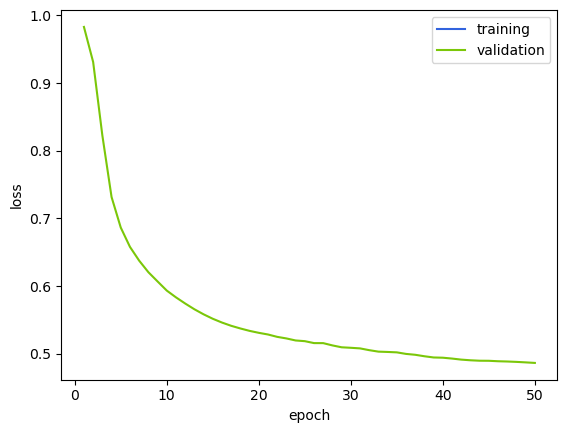

In [27]:
plt.plot(epoch_nums, training_loss, color="#3263de")
# Eğitim verileri üzerindeki kayıp değerlerini, epoch sayısına karşılık gelen epoch_nums 
# listesiyle birlikte çizgi grafiği olarak çizer.
plt.plot(epoch_nums, validation_loss, color="#7bc709")
# Doğrulama verileri üzerindeki kayıp değerlerini, epoch sayısına karşılık gelen epoch_nums 
# listesiyle birlikte çizgi grafiği olarak çizer.
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["training", "validation"], loc="upper right")
plt.show()

## Öğrenilen ağırlıkları ve önyargıları görüntüleme

Eğitilen model, eğitim sırasında optimize edici tarafından belirlenen nihai ağırlıklardan ve sapmalardan oluşur. Ağ modelimize göre, her katman için aşağıdaki değerleri beklemeliyiz:
* Katman 1: On çıkış düğümüne giden dört giriş değeri vardır, bu nedenle 10 x 4 ağırlık ve 10 sapma değeri olmalıdır.
* Katman 2: On çıkış düğümüne giden on giriş değeri vardır, bu nedenle 10 x 10 ağırlık ve 10 sapma değeri olmalıdır.
* Katman 3: Üç çıkış düğümüne giden on giriş değeri vardır, bu nedenle 3 x 10 ağırlık ve 3 sapma değeri olmalıdır.

In [30]:
# Bu kod parçası, modelinizin tüm ağırlıklarını (parametrelerini) yazdırmak için kullanılır. 
# PyTorch modelleri, bir modelin ağırlıklarını tutan bir "state_dict" adlı bir sözlük yapısı kullanır. 
# Bu kod parçası, modelin "state_dict"ini döngü kullanarak gezinir ve her ağırlık için adını ve değerini ekrana yazdırır. 
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.17806381 -0.06885676  0.11567162  0.5071392 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.21794528  0.58883333 -0.39406902 -0.1926559 ]
 [ 0.32143986  0.24654785 -0.203873    0.39804503]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.359966   -0.16362984 -0.23864383  0.3869499 ]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.46967584  0.7713393   0.29738548  0.15831248]]
fc1.bias 
 [ 0.02629578 -0.20101035  0.08459234 -0.46684736 -0.33979803 -0.46098104
  0.31546897  0.2516649  -0.22174752  0.23187749]
fc2.weight 
 [[ 0.20224687  0.3143725   0.12550515  0.04272011  0.21202639 -0.18619564
   0.05892715 -0.24517313 -0.21917307 -0.16335806]
 [ 0.14308453  0.07123283 -0.18731831  0.09553465  0.7180928  -0.0213007
   0.01207405  0.03178341  0.19618031  0.75087196]
 [-0.24369258 -0.09847097  0.12428063  0.2620103   0.40902406  0.33759764
   0.0

## Model performansını değerlendirme

Peki model iyi mi? Doğrulama verilerinden bildirilen ham doğruluk, oldukça iyi tahmin ettiğini gösteriyor gibi görünüyor; ancak biraz daha derine inmek ve olası her sınıf için tahminleri karşılaştırmak genellikle yararlıdır. Bir sınıflandırma modelinin performansını görselleştirmenin yaygın bir yolu, her sınıf için doğru ve yanlış tahminlerin bir çapraz tablosunu gösteren bir *karışıklık matrisi* oluşturmaktır.

In [31]:
# Pytorch yerleşik bir karışıklık matrisi metriğine sahip olmadığı için SciKit-Learn kullanacağız
from sklearn.metrics import confusion_matrix

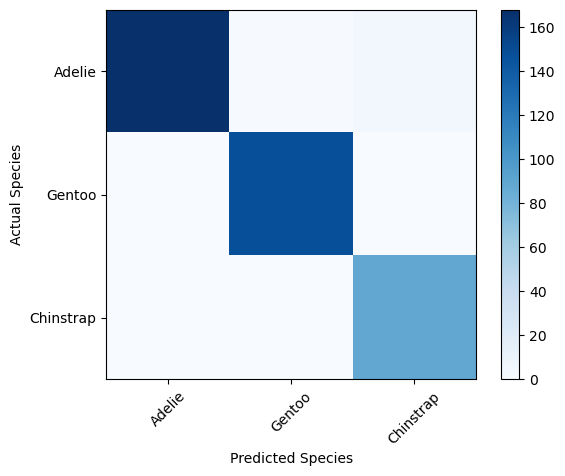

In [32]:
# Modeli değerlendirme moduna ayarlayın
model.eval()

# Test verileri için tahminler alın
x = torch.Tensor(X_test).float()
_, predicted = torch.max(model(x).data, 1)

# Karışıklık matrisini çizin
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Karışıklık matrisi, her sınıf için yanlıştan daha doğru tahmin olduğunu gösteren güçlü bir çapraz çizgi göstermelidir.


## Eğitimli modeli kullanma

Yeni bir penguen gözlemimiz olduğunda, türü tahmin etmek için modeli kullanabiliriz.

In [33]:
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

New sample: [[50.4, 15.3, 20, 50]]


In [34]:
# Modeli değerlendirme moduna ayarla
model.eval()

# Yeni veri örneği için bir tahmin alın
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

Prediction: Gentoo
